# Graph Algorithms

## 1. Stock Market

In this part of the project, we study data from stock market. The data is available on this
Dropbox Link. The goal of this part is to study correlation structures among 
uctuation
patterns of stock prices using tools from graph theory. The intuition is that investors will have
similar strategies of investment for stocks that are effected by the same economic factors. For
example, the stocks belonging the transportation sector may have different absolute prices, but
if for example fuel prices change or are expected to change signicantly in the near future, then
you would expect the investors to buy or sell all stocks similarly and maximize their returns.
Towards that goal, we construct different graphs based on similarities among the time series of
returns on different stocks at different time scales (day vs a week). Then, we study properties
of such graphs. The data is obtained from Yahoo Finance website for 3 years. You're provided
with a number of csv tables, each containing several elds: Date, Open, High, Low, Close,
Volume, and Adj Close price. The les are named according to Ticker Symbol of each stock.
You may nd the market sector for each company in Name sector.csv.

1. Return correlation
In this part of the project, we will compute the correlation among log-normalized stock-return
time series data. Before giving the expression for correlation, we introduce the following nota-
tion:

    pi(t) is the closing price of stock i at the tth day
    
    qi(t) is the return of stock i over a period of [t - 1, t]
    
    qi(t) = (pi(t) - pi(t - 1))/pi(t - 1)
    
    ri(t) is the log-normalized return stock i over a period of [t - 1, t]
    
    ri(t) = log(1 + qi(t)
    
    Then with the above notation, we dene the correlation between the log-normalized stock-return time series data of stocks i and j as
    pij = (⟨ri(t)rj(t)⟩ - ⟨ri(t)⟩⟨rj(t)⟩)/sqrt(⟨ri(t)2⟩ - ⟨ri(t)⟩2)(⟨rj(t)2⟩ - ⟨rj(t)⟩2)
    where ⟨⟩ is a temporal average on the investigated time regime (for our data set it is over 3 years).

### Question 1

What are upper and lower bounds on pij? Provide a justification for using log-normalized return (ri(t)) instead of regular return (qi(t)).

In [3]:
import csv
import math

nameSec = csv.reader(open('Data/finance_data/Name_sector.csv'))

nameSecArr = {}
namePriceArr = {}
nameReturnArr = {}
nameLogReturnArr = {}
correlationArr = {}

for row in nameSec:
    if row[0] == 'Symbol':
        continue
    else:
        nameSecArr[row[0]] = row[1]

for name in nameSecArr:
    file = 'Data/finance_data/data/' + name + '.csv'
    dataset = csv.reader(open(file))
    for row in dataset:
        if row[0] == 'Date':
            continue
        else:
            if name in namePriceArr:
                namePriceArr[name].append((row[0],eval(row[4])))
            else:
                namePriceArr[name] = [(row[0],eval(row[4]))]
#print (len(namePriceArr['A'])) #765

for name in namePriceArr:
    r_list = []
    for i in range(1,len(namePriceArr[name])):
        price_i = namePriceArr[name][i][1]
        price_iminors = namePriceArr[name][i-1][1]
        returnStock = (price_i - price_iminors)/price_i
        r_list.append(returnStock)
    nameReturnArr[name] = r_list
#print(len(nameReturnArr)) #505
#print(len(nameReturnArr['A'])) #764

for name in nameReturnArr:
    for i in nameReturnArr[name]:
        r = math.log(abs(1 + i))
        if name in nameLogReturnArr:
            nameLogReturnArr[name].append(r)
        else:
            nameLogReturnArr[name] = [r]

def correlationCal(return_i, return_j):
    if len(return_i) > len(return_j):
        return_i = return_i[0:len(return_j)]
    elif len(return_i) < len(return_j):
        return_j = return_j[0:len(return_i)]
    #lengths of returns are the same
    arrLen = len(return_i)
    
    product = 0
    sum_i = 0
    sum_j = 0
    sqrReturn_i = 0
    sqrReturn_j = 0
    for t in range(0,arrLen):
        product = product + return_i[t]*return_j[t]
        sum_i = sum_i + return_i[t]
        sum_j = sum_j + return_j[t]
        sqrReturn_i = sqrReturn_i + return_i[t]*return_i[t]
        sqrReturn_j = sqrReturn_j + return_j[t]*return_j[t]
    avgProduct = product/arrLen
    avgSum_i = sum_i/arrLen
    avgSum_j = sum_j/arrLen
    avgSqrReturn_i = sqrReturn_i/arrLen
    avgSqrReturn_j = sqrReturn_j/arrLen

    correlation = (avgProduct - avgSum_i*avgSum_j)/math.sqrt((avgSqrReturn_i-avgSum_i*avgSum_i)*(avgSqrReturn_j-avgSum_j*avgSum_j))
    return correlation
                
for name_i in nameLogReturnArr:
    for name_j in nameLogReturnArr:
        if name_i == name_j:
            continue
        elif (name_i,name_j) in correlationArr:
             continue
        elif (name_j,name_i) in correlationArr:
             continue
        else:
            correlationArr[(name_j,name_i)] = correlationCal(nameLogReturnArr[name_i],nameLogReturnArr[name_j])
            #print(correlationArr[(name_j,name_i)])
        

In [4]:
minValue = 1
maxValue = -1
for test in correlationArr:    
    #print(correlationArr[test])
    x = correlationArr[test]
    if x > maxValue:
        maxValue = x
    elif x < minValue:
        minValue = x
print(minValue)
print(maxValue)        

-0.9553628243170165
0.9990862047478959


## 2. Constructing correlation graphs

In this part,we construct a correlation graph using the correlation coefficient computed in the
previous section. The correlation graph has the stocks as the nodes and the edge weights are
given by the following expression
wij = sqrt(2(1-pi))

Compute the edge weights using the above expression and construct the correlation graph.

### Question 2

Plot a histogram showing the un-normalized distribution of edge weights.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
for name in nameLogReturnArr:
    G.add_node(name)

edgeWeight = {}
for test in correlationArr:
    x = correlationArr[test]
    w = math.sqrt(2*(1-x))
    if test in edgeWeight:
        edgeWeight[test].append(w)
    else:
        edgeWeight[test] = [w]
    G.add_edge(test[0], test[1], weight = w)

C:\Users\yifan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


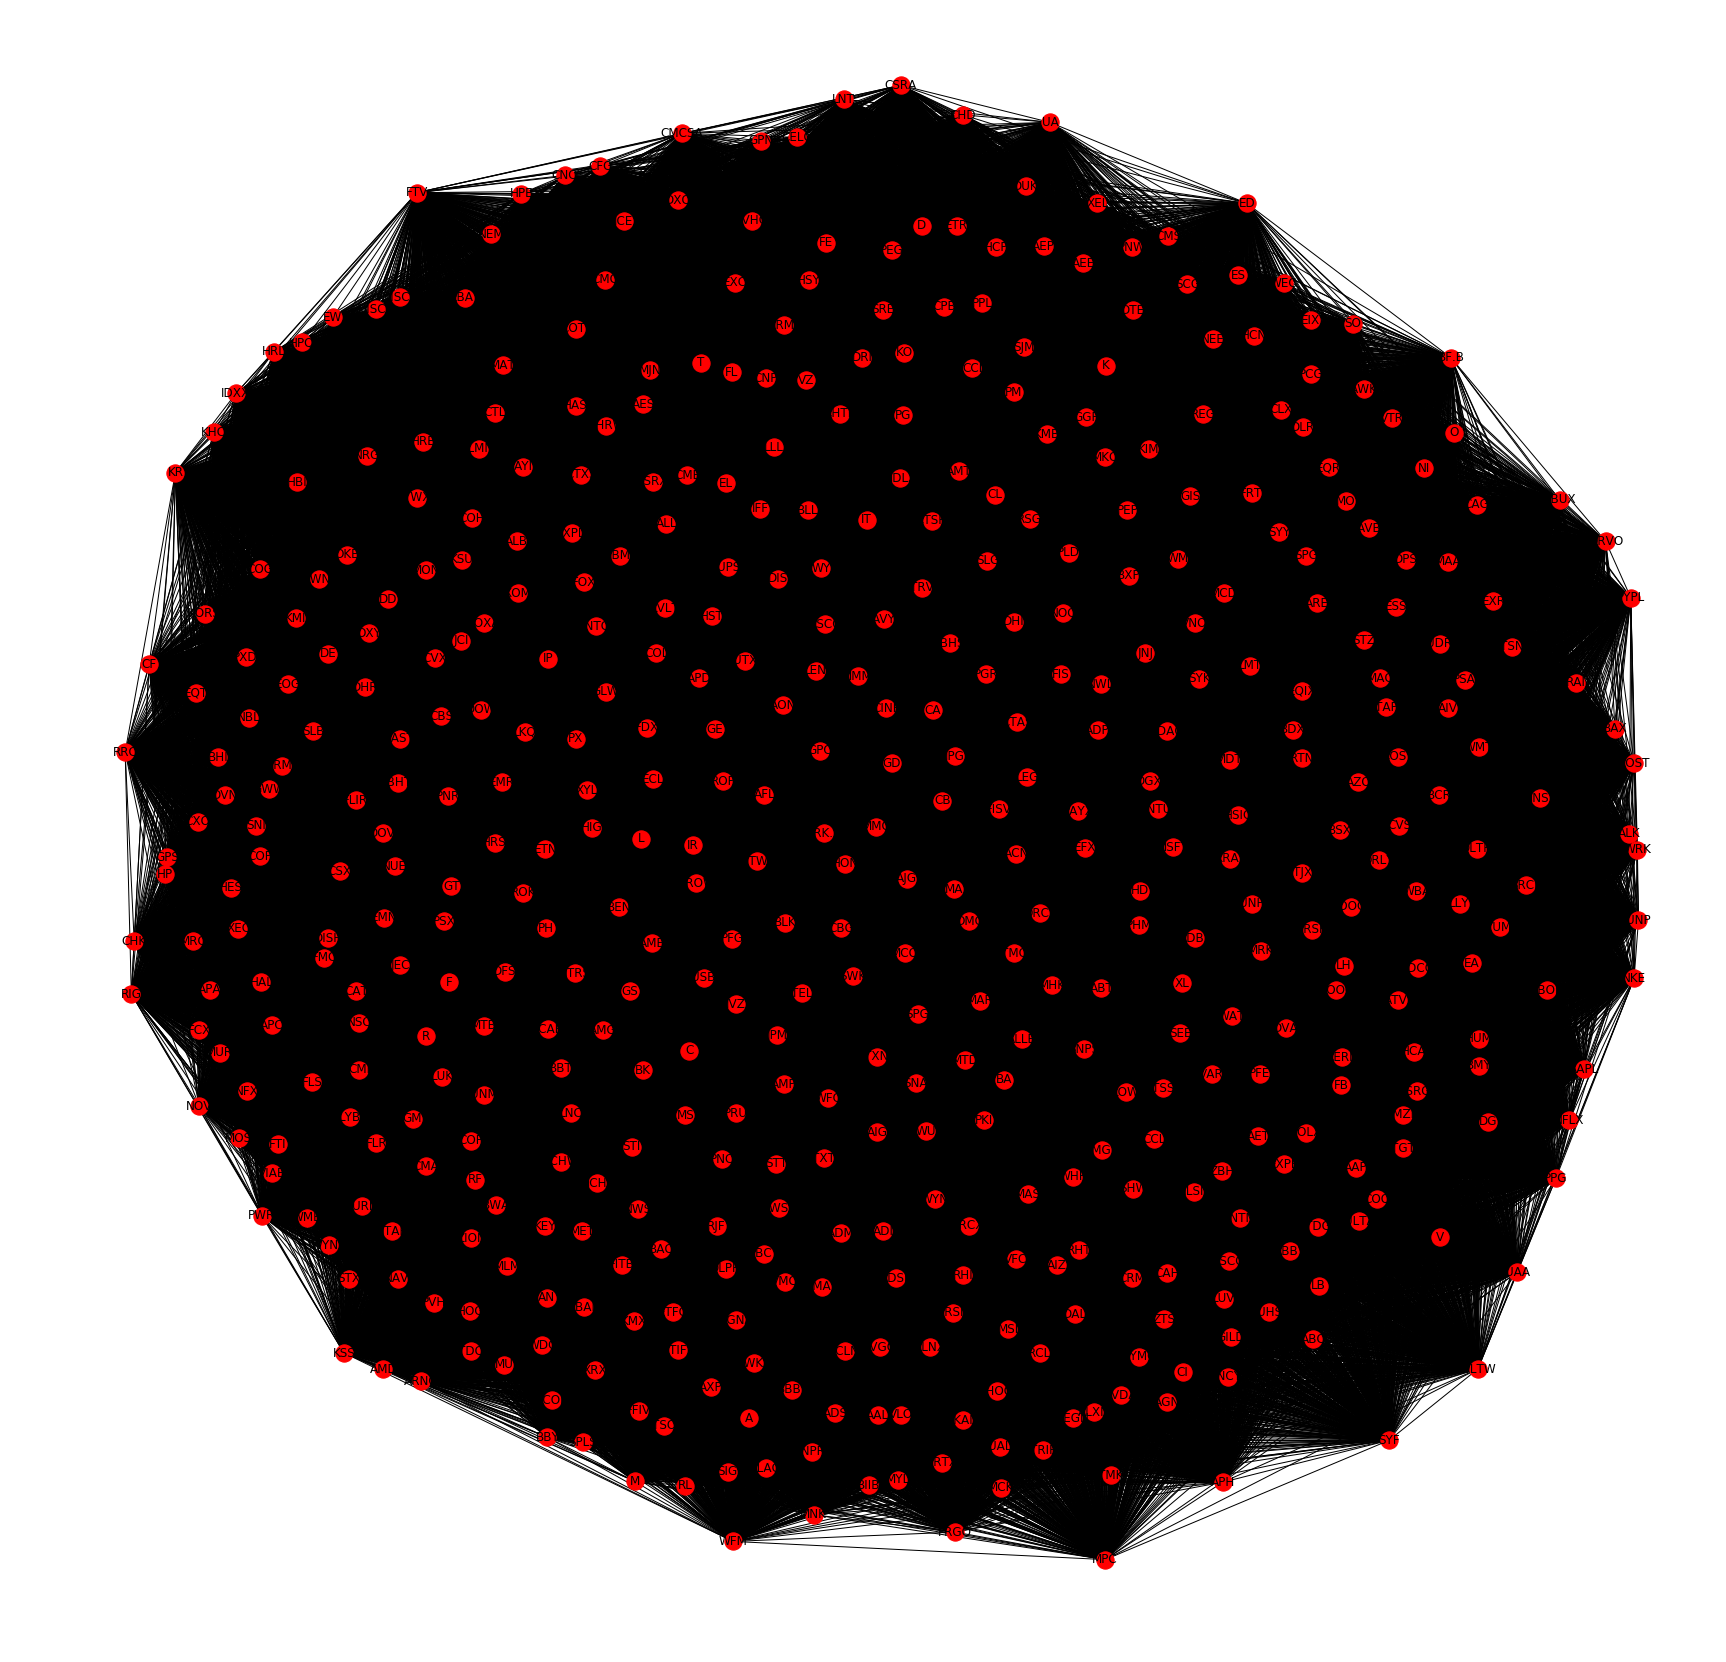

In [4]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(G,pos)
plt.show()

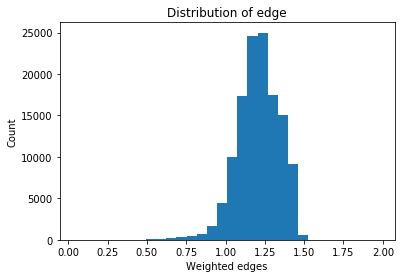

In [5]:
hist_g = []

for test in edgeWeight: 
    x = sum(edgeWeight[test])/len(edgeWeight[test])
    hist_g.append(x)
    
plt.hist(hist_g, density=False, bins=30)
plt.xlabel('Weighted edges')
plt.ylabel('Count')
plt.title('Distribution of edge')
plt.show()    

## 3. Minimum spanning tree (MST)

In this part of the project, we will extract the MST of the correlation graph and interpret it.

### Question 3

Extract the MST of the correlation graph. Each stock can be categorized into
a sector, which can be found in Name sector.csv le. Plot the MST and color-code the nodes
based on sectors. Do you see any pattern in the MST? The structures that you nd in MST are
called Vine clusters. Provide a detailed explanation about the pattern you observe.

In [7]:
import random
T = nx.minimum_spanning_tree(G)
#print(sorted(T.edges(data=True))) [('A', 'LH', {'weight': 1.0117622221417724}),('AAL', 'DAL',...
categoryArr = []
for name in nameLogReturnArr:
    T.nodes[name]['sector'] = nameSecArr[name]       
    #print(T.nodes[name]['sector'])
    if nameSecArr[name] in categoryArr:
        continue
    else:
        categoryArr.append(nameSecArr[name])
#print(categoryArr) ['Health Care', 'Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Utilities', 'Financials', 'Real Estate', 'Materials', 'Energy', 'Telecommunication Services']
#print(len(categoryArr))

In [8]:
import random

number_of_colors = len(categoryArr)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(number_of_colors)]

color = []
for node in T.nodes:
    for i in range(0, number_of_colors):
        if T.nodes[node]['sector'] == categoryArr[i]:
            color.append(colors[i])

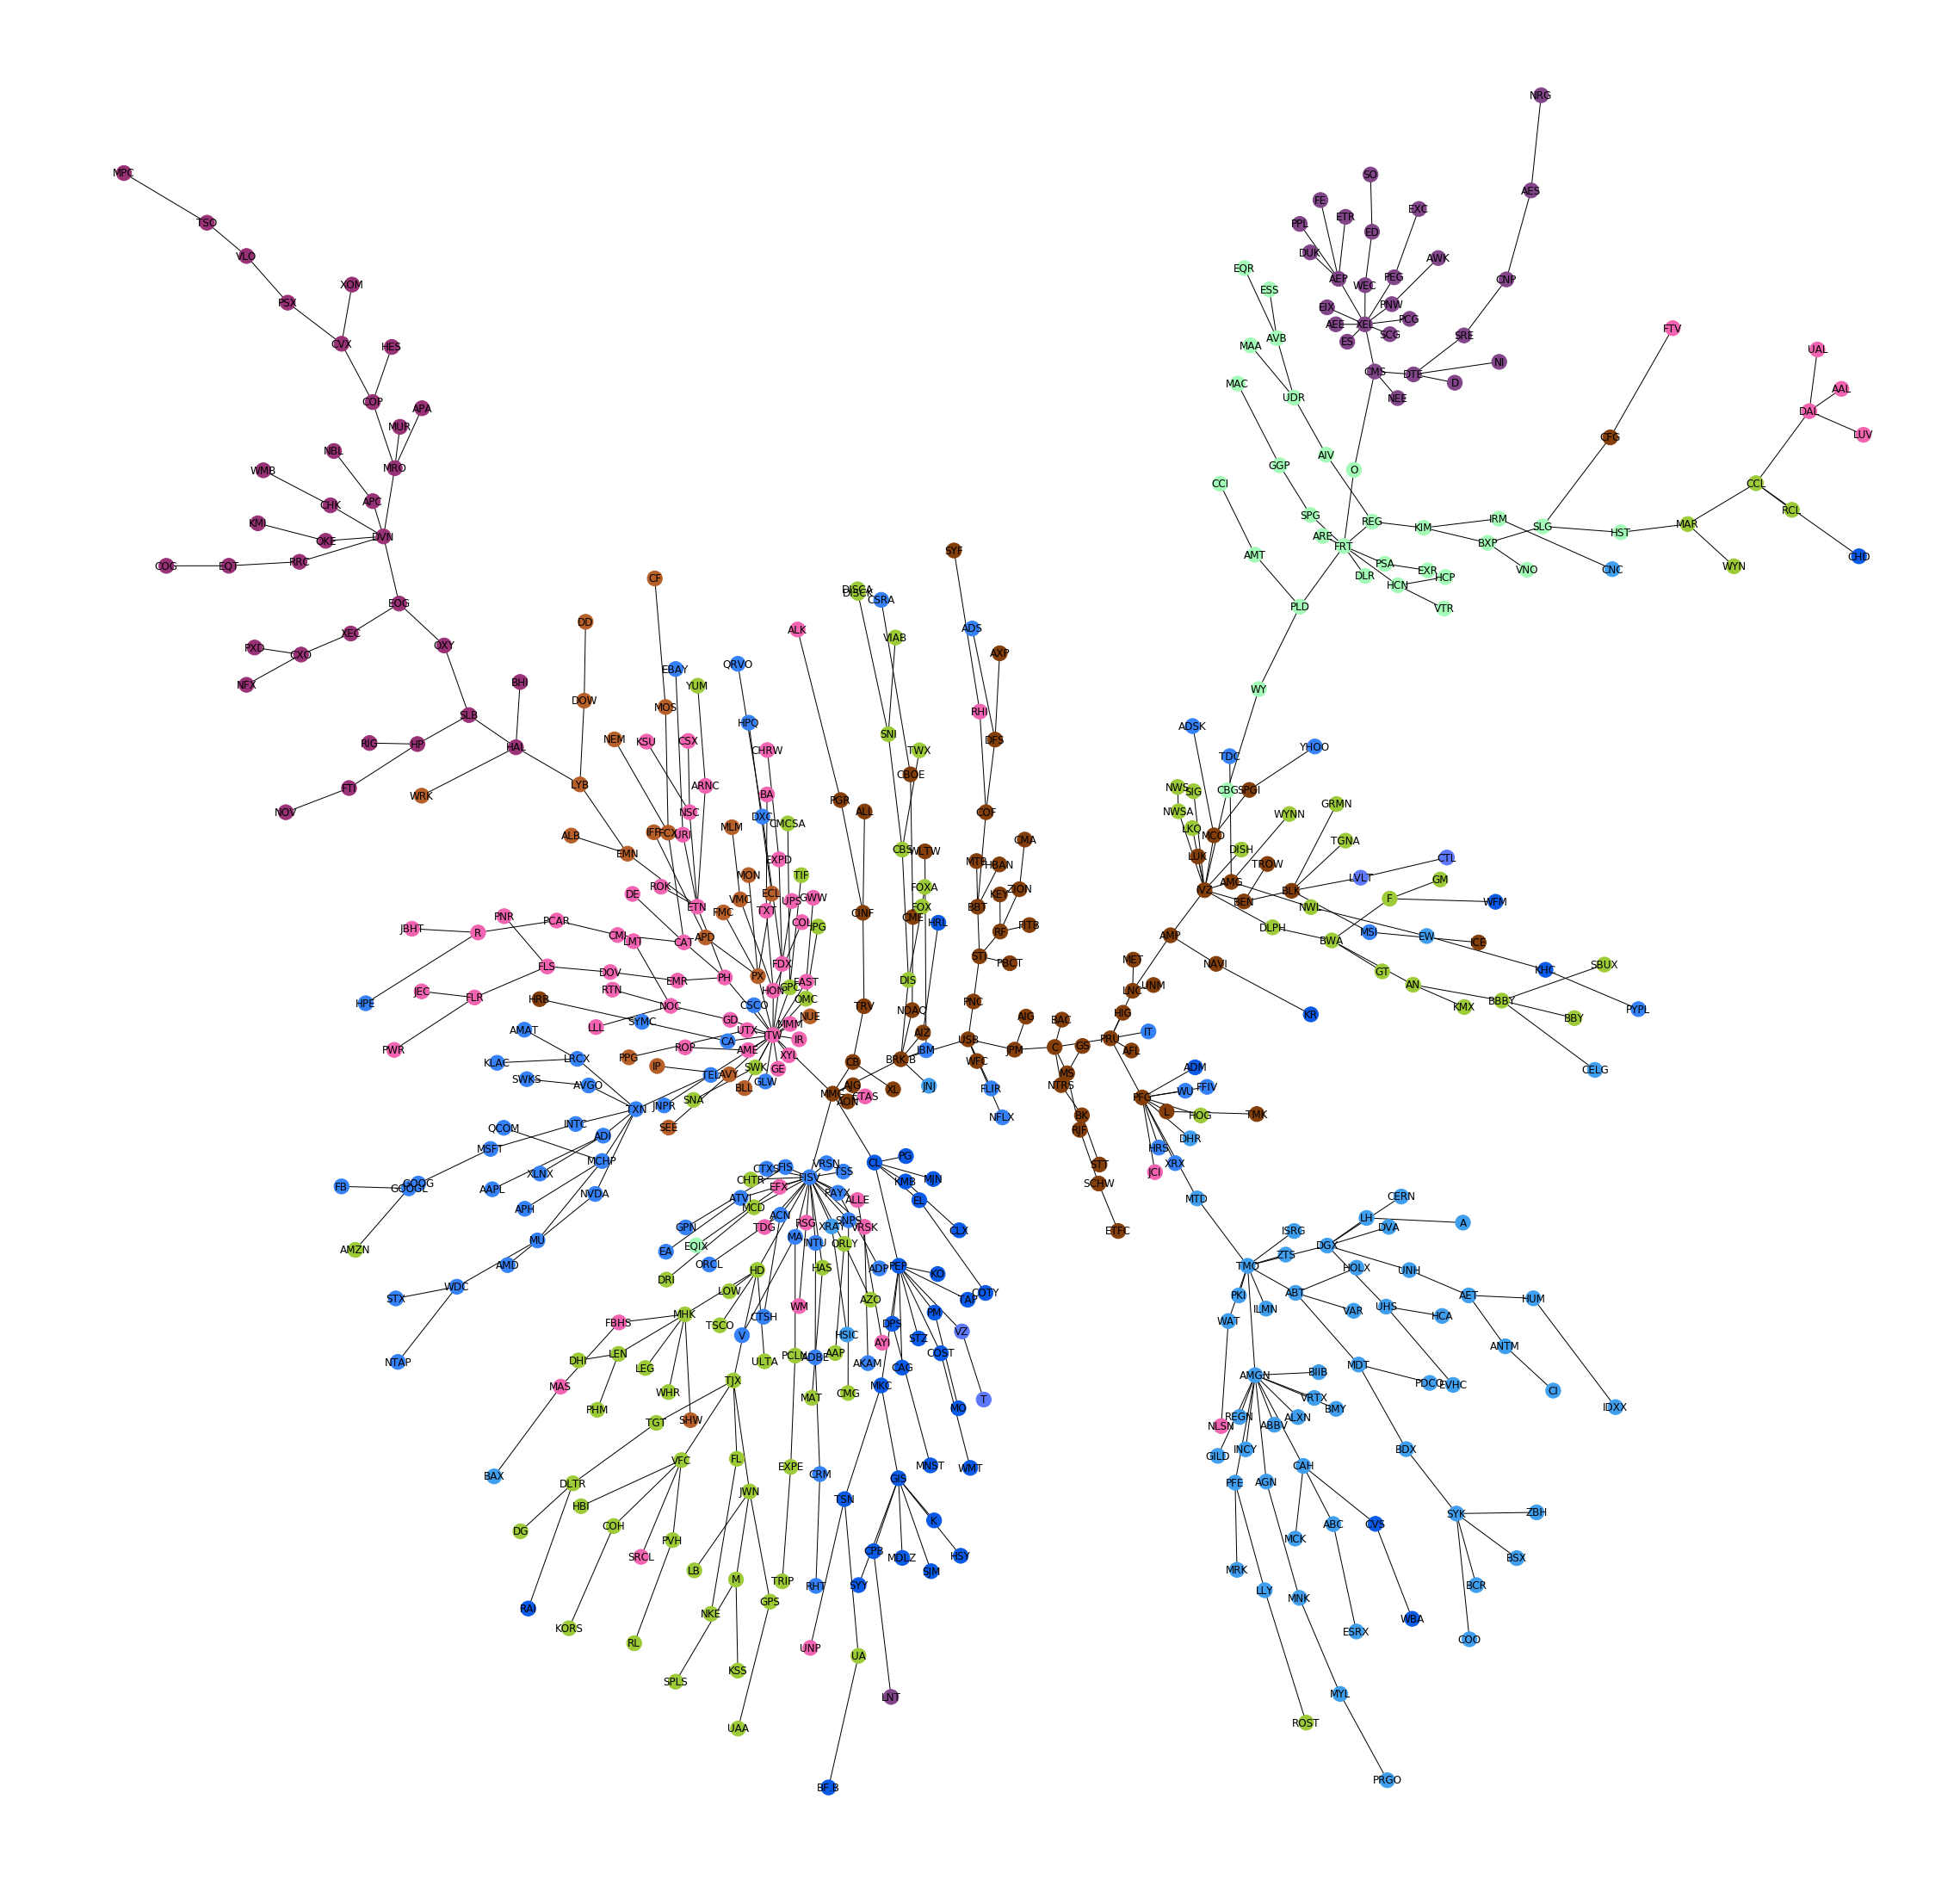

In [9]:
pos2 = nx.kamada_kawai_layout(T)
plt.figure(figsize=(40,40))
plt.axis('off')
nx.draw_networkx(T,pos2, node_color = color)
plt.show()

## 4. Sector clustering in MST's

In this part, we want to predict the market sector of an unknown stock. We will explore two
methods for performing the task. In order to evaluate the performance of the methods we
define the following metric
a = (1/|V|)*sum(P(vi in Si)) via vi in V
where Si is the sector of node i. Define
P(vi in Si) = |Qi|/|Ni|
where Qi is the set of neighbors of node i that belong to the same sector as node i and Ni is
the set of neighbors of node i. Compare  with the case where
P(vi in Si) = |Si|/|V|

### Qustion4

Report the value of a for the above two cases and provide an interpretation for
the difference.

In [17]:
V_length = len(T.nodes)
alpha = 0
for node1 in T.nodes:
    Ni = 0
    Qi = 0
    for node2 in T.neighbors(node1):
        Ni = Ni + 1
        if T.nodes[node1]['sector'] == T.nodes[node2]['sector']:
            Qi = Qi + 1
    alpha = alpha + Qi / Ni
print('first method alpha is: ', alpha/V_length)

first method alpha is:  0.7887932644196097


In [28]:
sum_alpha = 0
for i in range(0, len(categoryArr)):
    Si =0
    alpha = 0
    for node1 in T.nodes:
        if T.nodes[node1]['sector'] == categoryArr[i]:
            Si = Si + 1
        alpha = alpha + Si/V_length
    print('second method alpha for sector',categoryArr[i] ,'is: ', alpha/V_length)    
    sum_alpha = sum_alpha + alpha/V_length
print('second method alpha is: ', sum_alpha/len(categoryArr)) 
    

second method alpha for sector Health Care is:  0.06660131359670587
second method alpha for sector Industrials is:  0.06313498676600318
second method alpha for sector Consumer Discretionary is:  0.07705911185177904
second method alpha for sector Information Technology is:  0.07098519752965389
second method alpha for sector Consumer Staples is:  0.03496912067444357
second method alpha for sector Utilities is:  0.029314773061464496
second method alpha for sector Financials is:  0.06789922556612067
second method alpha for sector Real Estate is:  0.0318321733163414
second method alpha for sector Materials is:  0.025511224389765576
second method alpha for sector Energy is:  0.030906773845701306
second method alpha for sector Telecommunication Services is:  0.002776198411920402
second method alpha is:  0.045544554455445405


## 5. Correlation graphs for weekly data

In the previous parts, we constructed the correlation graph based on daily data. In this part of
the project, we will construct a correlation graph based on weekly data. To create the graph,
sample the stock data weekly on Mondays and then calculate ij using the sampled data. If
there is a holiday on a Monday, we ignore that week. Create the correlation graph based on
weekly data.

### Question 5

Extract the MST from the correlation graph based on weekly data. Compare the
pattern of this MST with the pattern of the MST found in Question 3.

In [30]:
import csv
import math

nameSec = csv.reader(open('Data/finance_data/Name_sector.csv'))

nameSecArr = {}
namePriceArr = {}
nameReturnArr = {}
nameLogReturnArr = {}
correlationArr = {}

for row in nameSec:
    if row[0] == 'Symbol':
        continue
    else:
        nameSecArr[row[0]] = row[1]

for name in nameSecArr:
    file = 'Data/finance_data/data/' + name + '.csv'
    dataset = csv.reader(open(file))
    for row in dataset:
        if row[0] == 'Date':
            continue
        else:
            if name in namePriceArr:
                namePriceArr[name].append((row[0],eval(row[4])))
            else:
                namePriceArr[name] = [(row[0],eval(row[4]))]
#print (len(namePriceArr['A'])) #765

import time
import datetime
nameSmpPriceArr = {}
for name in namePriceArr:
    if namePriceArr[name][0][0] == '2014-05-01':
        for i in range(0,len(namePriceArr[name])):
            strdate = namePriceArr[name][i][0]
            weekday = datetime.datetime.strptime(strdate,'%Y-%m-%d')
            weekdayname = weekday.strftime("%A")
            if weekdayname == 'Monday':
                if name in nameSmpPriceArr:
                    nameSmpPriceArr[name].append(namePriceArr[name][i])
                else:
                    nameSmpPriceArr[name] = [namePriceArr[name][i]]


C:\Users\yifan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


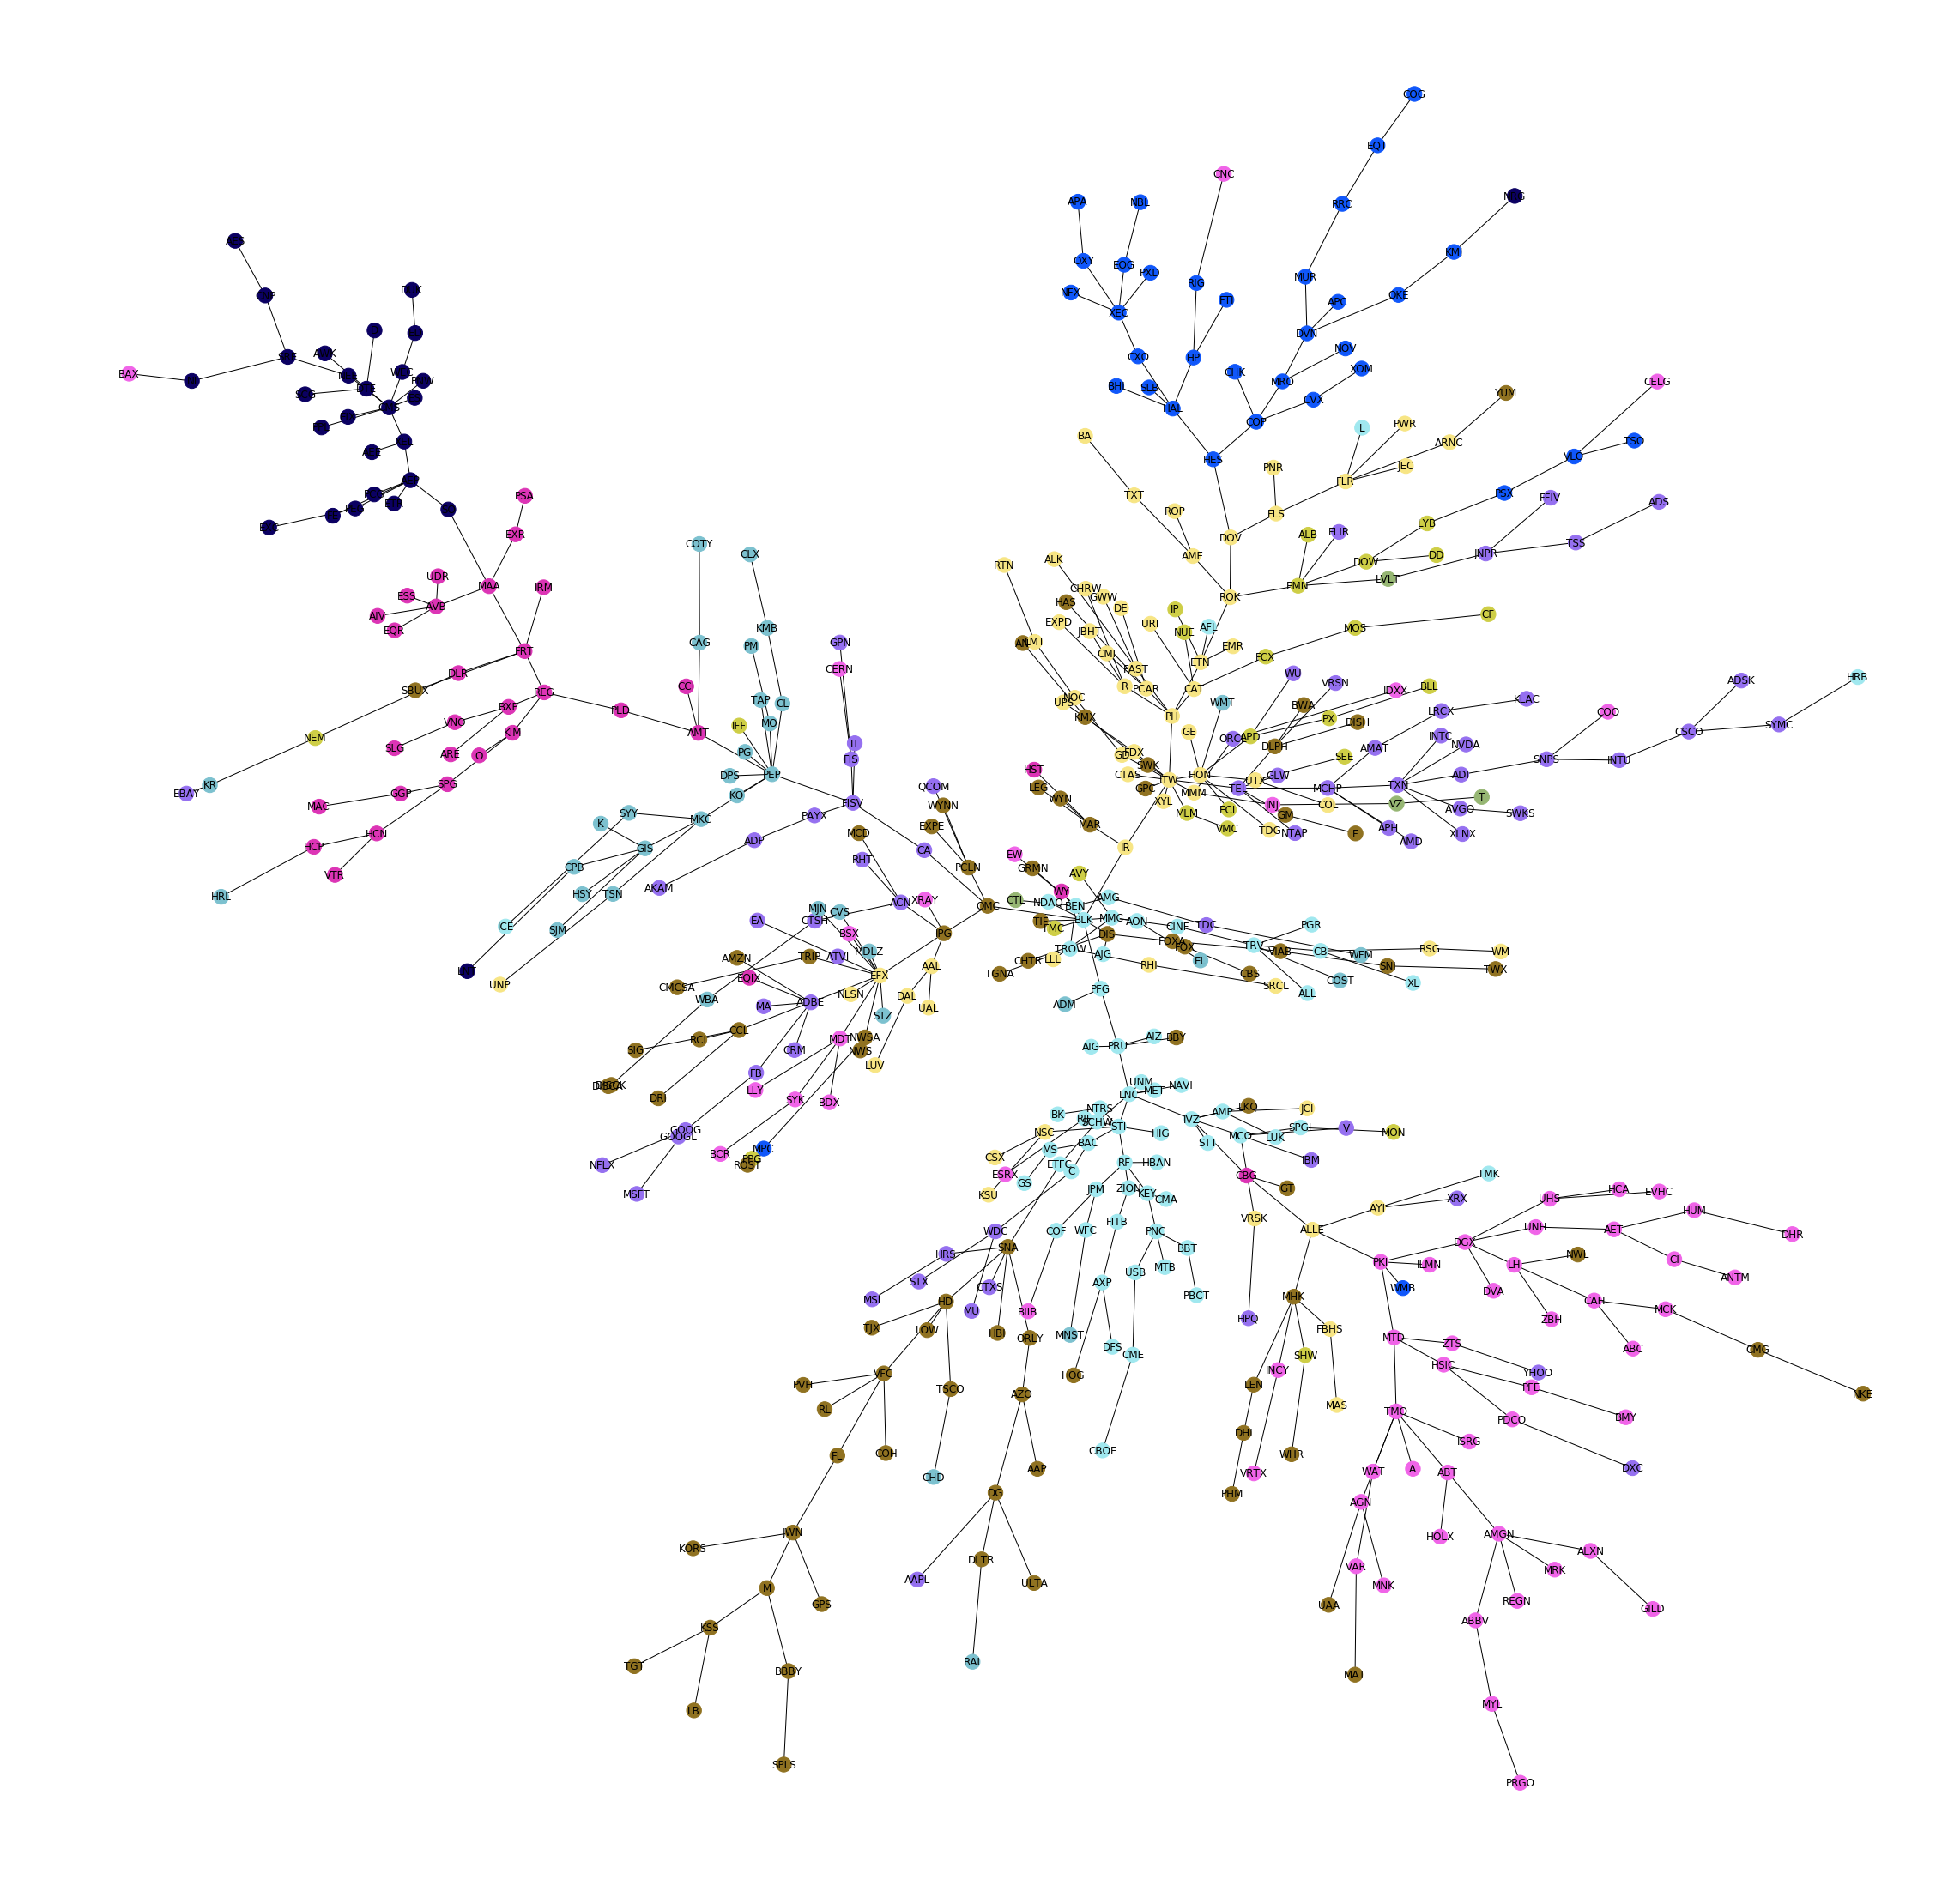

In [31]:
for name in nameSmpPriceArr:
    r_list = []
    for i in range(1,len(nameSmpPriceArr[name])):
        price_i = nameSmpPriceArr[name][i][1]
        price_iminors = nameSmpPriceArr[name][i-1][1]
        returnStock = (price_i - price_iminors)/price_i
        r_list.append(returnStock)
    nameReturnArr[name] = r_list
#print(len(nameReturnArr)) #505
#print(len(nameReturnArr['A'])) #764

for name in nameReturnArr:
    for i in nameReturnArr[name]:
        r = math.log(abs(1 + i))
        if name in nameLogReturnArr:
            nameLogReturnArr[name].append(r)
        else:
            nameLogReturnArr[name] = [r]

def correlationCal(return_i, return_j):
    if len(return_i) > len(return_j):
        return_i = return_i[0:len(return_j)]
    elif len(return_i) < len(return_j):
        return_j = return_j[0:len(return_i)]
    #lengths of returns are the same
    arrLen = len(return_i)
    
    product = 0
    sum_i = 0
    sum_j = 0
    sqrReturn_i = 0
    sqrReturn_j = 0
    for t in range(0,arrLen):
        product = product + return_i[t]*return_j[t]
        sum_i = sum_i + return_i[t]
        sum_j = sum_j + return_j[t]
        sqrReturn_i = sqrReturn_i + return_i[t]*return_i[t]
        sqrReturn_j = sqrReturn_j + return_j[t]*return_j[t]
    avgProduct = product/arrLen
    avgSum_i = sum_i/arrLen
    avgSum_j = sum_j/arrLen
    avgSqrReturn_i = sqrReturn_i/arrLen
    avgSqrReturn_j = sqrReturn_j/arrLen

    correlation = (avgProduct - avgSum_i*avgSum_j)/math.sqrt((avgSqrReturn_i-avgSum_i*avgSum_i)*(avgSqrReturn_j-avgSum_j*avgSum_j))
    return correlation
                
for name_i in nameLogReturnArr:
    for name_j in nameLogReturnArr:
        if name_i == name_j:
            continue
        elif (name_i,name_j) in correlationArr:
             continue
        elif (name_j,name_i) in correlationArr:
             continue
        else:
            correlationArr[(name_j,name_i)] = correlationCal(nameLogReturnArr[name_i],nameLogReturnArr[name_j])
            #print(correlationArr[(name_j,name_i)])
            
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

G = nx.Graph()
for name in nameLogReturnArr:
    G.add_node(name)

edgeWeight = {}
for test in correlationArr:
    x = correlationArr[test]
    w = math.sqrt(2*(1-x))
    if test in edgeWeight:
        edgeWeight[test].append(w)
    else:
        edgeWeight[test] = [w]
    G.add_edge(test[0], test[1], weight = w)     

T = nx.minimum_spanning_tree(G)
categoryArr = []
for name in nameLogReturnArr:
    T.nodes[name]['sector'] = nameSecArr[name]       
    #print(T.nodes[name]['sector'])
    if nameSecArr[name] in categoryArr:
        continue
    else:
        categoryArr.append(nameSecArr[name])
        
number_of_colors = len(categoryArr)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(number_of_colors)]

color = []
for node in T.nodes:
    for i in range(0, number_of_colors):
        if T.nodes[node]['sector'] == categoryArr[i]:
            color.append(colors[i])
            
pos2 = nx.kamada_kawai_layout(T)
plt.figure(figsize=(40,40))
plt.axis('off')
nx.draw_networkx(T,pos2, node_color = color)
plt.show()

## 2. Let’s Help Santa!

Go to “Uber Movement” website and download data of Monthly Aggregate (all days), 2017 Quarter 4, for San Francisco area1. The dataset contains pairwise traveling time statistics between most pairs of points in San Francisco area. Points on the map are represented by unique IDs. To understand the correspondence between map IDs and areas, download Geo Boundaries file from the same website2. This file contains latitudes and longitudes of the corners of the polygons circumscribing each area. In addition, it contains one street address inside each area, referred to as DISPLAY NAME. To be specific, if an area is represented by a polygon with 5 corners, then you have a 5 × 2 matrix of the latitudes and longitudes, each row of which represents latitude and longitude of one corner.

### Question 6:
Report the number of nodes and edges in G.

In [12]:
import numpy as np
import pandas as pd
import json as js
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
%matplotlib inline

data = pd.read_csv('Data/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv', header=0, sep=',')
json_data = pd.read_json("Data/san_francisco_censustracts.json")

In [13]:
# Get node attribute and add node to graph
node_dic = {}
G = nx.Graph()

for node_info in json_data['features']:
    node_id = int(node_info['properties']['MOVEMENT_ID'])
    if node_id in node_dic:
        print('WTf')
    else:
        dis_name = node_info['properties']['DISPLAY_NAME']
        location = np.mean(np.array(node_info['geometry']['coordinates'][0][0]), axis=0)
        node_dic[node_id] = {'DISPLAY_NAME':dis_name, 'Location':location}
        G.add_node(node_id, name=dis_name, Location=location)

In [14]:
data_row = data.shape[0]
data_col = data.shape[1]
edge_dic = {}

# Get edges and avg of multi-edges
for idx in range(data_row):
    if int(data['month'][idx]) != 12:
        continue
    edge_w = float(data['mean_travel_time'][idx])
    sourceid = int(data['sourceid'][idx])
    dstid = int(data['dstid'][idx])
    if (sourceid, dstid) in edge_dic:
        edge_dic[(sourceid, dstid)][0] += edge_w
        edge_dic[(sourceid, dstid)][1] += 1
    elif (dstid, sourceid) in edge_dic:
        edge_dic[(dstid, sourceid)][0] += edge_w
        edge_dic[(dstid, sourceid)][1] += 1
    else:
        edge_dic[(sourceid, dstid)] = [edge_w, 1]

In [15]:
# add edges to the graph
for key, item in edge_dic.items():
    w = item[0]/item[1]
    G.add_edge(key[0], key[1], weight=w)
    
Gcc = max(nx.connected_component_subgraphs(G), key=len)

In [16]:
print("Number of nodes are:", nx.number_of_nodes(Gcc))
print("Number of edges are:", nx.number_of_edges(Gcc))

Number of nodes are: 1898
Number of edges are: 321703


### Question 7:
Build a minimum spanning tree (MST) of graph G. Report the street addresses of the two endpoints of a few edges. Are the results intuitive?

In [17]:
MST = nx.minimum_spanning_tree(Gcc)

In [18]:
for point in sorted(nx.edges(MST)):
    print(node_dic[point[0]]["DISPLAY_NAME"], "----", node_dic[point[1]]["DISPLAY_NAME"])

400 Northumberland Avenue, Redwood Oaks, Redwood City ---- 1500 Oxford Street, Palm Park, Redwood City
400 Northumberland Avenue, Redwood Oaks, Redwood City ---- 100 Fifth Avenue, South Fair Oaks, Redwood City
18300 Sutter Boulevard, Morgan Hill ---- 17300 Lotus Way, Morgan Hill
18300 Sutter Boulevard, Morgan Hill ---- 1900 Alpet Drive, Morgan Hill
3200 Huntsman Drive, Rosemont Park, Sacramento ---- 8900 Cal Center Drive, Sacramento
3200 Huntsman Drive, Rosemont Park, Sacramento ---- 9500 River Rose Way, Premier Garden, Sacramento
100 Carlsbad Circle, Vacaville ---- Interstate 505, Vacaville
100 Carlsbad Circle, Vacaville ---- 500 Morningstar Way, Vacaville
Unnamed Road, Vacaville ---- 400 Bowline Drive, Vacaville
Unnamed Road, Vacaville ---- 100 Monte Verde Drive, Vacaville
700 Carlsbad Court, Petaluma ---- 0 Maria Drive, Petaluma
700 Carlsbad Court, Petaluma ---- 200 Ely Road North, Petaluma
700 Carlsbad Court, Petaluma ---- 900 Telford Lane, Petaluma
500 Hyde Street, Tenderloin, San

Uptown Alley, Central Sacramento, Sacramento ---- Uptown Alley, Central Sacramento, Sacramento
Uptown Alley, Central Sacramento, Sacramento ---- Lincoln Highway, Central Sacramento, Sacramento
3100 Ruskin Drive, North San Jose, San Jose ---- 4200 Sierra Road, Berryessa, San Jose
400 Northlake Drive, West San Jose, San Jose ---- 300 Kiely Boulevard, West San Jose, San Jose
400 Northlake Drive, West San Jose, San Jose ---- 200 Westridge Drive, Central San Jose, Santa Clara
10300 North Stelling Road, Cupertino ---- Junipero Serra Freeway, Cupertino
1600 Maddux Drive, Woodside Plaza, Redwood City ---- 3900 Farm Hill Boulevard, Farm Hills, Redwood City
1500 Wawona Drive, Willow Glen South - Lincoln Glen, San Jose ---- 1700 Balsa Avenue, Doerr - Steindorf, San Jose
1500 Wawona Drive, Willow Glen South - Lincoln Glen, San Jose ---- 3800 Willowood Drive, South San Jose, San Jose
600 Cornell Avenue, Albany ---- 700 Ramona Avenue, Albany
19900 Kings Creek Road, Boulder Creek ---- 13700 Long Ridg

### Question 8:
Determine what percentage of triangles in the graph (sets of 3 points on the map) satisfy the triangle inequality. You do not need to inspect all triangles, you can just estimate by random sampling of 1000 triangles.

In [19]:
import random

node_scale = max(node_dic.keys())
sample_num = 0
triangle_num = 0
used = set()

while sample_num < 1000:
    sourceid = random.randint(1, node_scale)
    dstid = random.randint(1, node_scale)
    midid = random.randint(1, node_scale)
    if sourceid != midid != dstid and (sourceid, dstid) in edge_dic \
    and (sourceid, midid) in edge_dic and (midid, dstid) in edge_dic \
    and (sourceid, midid, dstid) not in used:
        used.add((sourceid, midid, dstid))
        sample_num += 1
        dij = edge_dic[(sourceid, midid)][0]/edge_dic[(sourceid, midid)][1]
        djk = edge_dic[(midid, dstid)][0]/edge_dic[(midid, dstid)][1]
        dik = edge_dic[(sourceid, dstid)][0]/edge_dic[(sourceid, dstid)][1]
        if dij+djk > dik:
            triangle_num += 1

print(triangle_num/sample_num*100, "% of triangles in the graph satisfy the triangle inequality", sep='')

97.89999999999999% of triangles in the graph satisfy the triangle inequality


### Question 9:
Find an upper bound on the empirical performance of the approximate algorithm:
$$\rho = \frac{\text{Approximate TSP Cost}}{\text{Optimal TSP Cost}}$$

In [20]:
# Create multi-graph
Multi_G = nx.MultiDiGraph()
Multi_G.add_nodes_from(MST)
path = []

for edge in MST.edges:
    w = MST.edges[edge]['weight']
    Multi_G.add_edge(edge[0], edge[1], weight=w)
    Multi_G.add_edge(edge[1], edge[0], weight=w)
    
# Find Euler-circle
Euler_circle = nx.eulerian_circuit(Multi_G)

# Calculate the length of the tour from Euler-circle
# (There are multiple Euler-circles, here we only choose the first circle)
travel_length = 0
idx = 0

for edge in Euler_circle:
    if idx == 0:
        start = edge[0]
    if edge[1] == start:
        print(edge[0])
        dst = edge[0]
        path.append(dst)
        print('---------------------------------------')
        break
    travel_length += Multi_G.edges[edge[0], edge[1], 0]['weight']
    path.append(edge[0])
    print(edge[0], "->", end=' ')
    idx += 1
    
print("Approximate TSP cost is:", travel_length)

2 -> 1727 -> 530 -> 1734 -> 2456 -> 531 -> 2378 -> 2607 -> 2240 -> 1852 -> 2240 -> 2607 -> 2378 -> 531 -> 1725 -> 1726 -> 2251 -> 1736 -> 1737 -> 1363 -> 1737 -> 1736 -> 2251 -> 1726 -> 1725 -> 531 -> 2456 -> 1734 -> 530 -> 394 -> 1721 -> 1724 -> 2513 -> 2229 -> 2513 -> 232 -> 2155 -> 347 -> 1851 -> 347 -> 1359 -> 881 -> 562 -> 125 -> 1850 -> 1849 -> 1848 -> 1849 -> 1850 -> 125 -> 562 -> 86 -> 2305 -> 741 -> 345 -> 1833 -> 920 -> 1832 -> 1838 -> 1337 -> 1357 -> 1825 -> 2222 -> 2223 -> 1853 -> 744 -> 2490 -> 744 -> 1869 -> 1361 -> 1358 -> 742 -> 1358 -> 1361 -> 1869 -> 744 -> 1853 -> 2223 -> 2222 -> 1333 -> 1948 -> 1333 -> 829 -> 2656 -> 1949 -> 1937 -> 557 -> 1936 -> 2221 -> 1936 -> 725 -> 1947 -> 725 -> 1936 -> 557 -> 1311 -> 1329 -> 824 -> 1935 -> 1933 -> 1935 -> 1331 -> 1934 -> 2376 -> 1934 -> 2232 -> 1934 -> 1331 -> 1935 -> 1222 -> 2173 -> 724 -> 1330 -> 390 -> 1871 -> 1381 -> 831 -> 745 -> 831 -> 1381 -> 170 -> 1381 -> 1871 -> 563 -> 1872 -> 563 -> 1871 -> 390 -> 1330 -> 724 -> 21

-> 808 -> 285 -> 1080 -> 1504 -> 1080 -> 285 -> 808 -> 457 -> 2597 -> 181 -> 1045 -> 611 -> 1056 -> 611 -> 1045 -> 181 -> 612 -> 2346 -> 1527 -> 2346 -> 612 -> 181 -> 809 -> 322 -> 1046 -> 1053 -> 446 -> 949 -> 446 -> 1053 -> 591 -> 2215 -> 99 -> 2215 -> 1536 -> 287 -> 1536 -> 810 -> 1537 -> 2437 -> 2218 -> 1539 -> 2342 -> 2519 -> 2216 -> 2214 -> 2421 -> 2225 -> 2421 -> 2214 -> 1530 -> 1058 -> 1529 -> 2435 -> 1529 -> 1058 -> 1530 -> 2214 -> 2216 -> 613 -> 2216 -> 2519 -> 1065 -> 2438 -> 1065 -> 2519 -> 2342 -> 1539 -> 2218 -> 594 -> 2217 -> 1541 -> 2219 -> 2633 -> 2646 -> 2633 -> 1544 -> 1543 -> 1544 -> 2633 -> 2219 -> 1541 -> 2217 -> 1462 -> 1064 -> 460 -> 593 -> 1538 -> 593 -> 1062 -> 593 -> 460 -> 1064 -> 1462 -> 2217 -> 594 -> 2218 -> 2348 -> 1540 -> 2348 -> 2530 -> 1519 -> 1520 -> 47 -> 1520 -> 1519 -> 2603 -> 1087 -> 1088 -> 1521 -> 1088 -> 167 -> 1067 -> 2220 -> 461 -> 1542 -> 811 -> 1542 -> 461 -> 2220 -> 1067 -> 167 -> 466 -> 167 -> 1088 -> 1087 -> 805 -> 2611 -> 1098 -> 1094 

 1305 -> 687 -> 544 -> 1903 -> 1232 -> 2171 -> 1232 -> 1903 -> 544 -> 687 -> 1233 -> 1919 -> 695 -> 1920 -> 916 -> 1921 -> 1923 -> 1921 -> 1922 -> 1921 -> 696 -> 546 -> 696 -> 1921 -> 916 -> 1920 -> 695 -> 1237 -> 695 -> 1919 -> 380 -> 930 -> 1309 -> 455 -> 721 -> 1912 -> 720 -> 1911 -> 919 -> 2595 -> 1910 -> 1304 -> 1910 -> 2595 -> 919 -> 1911 -> 739 -> 2370 -> 739 -> 1829 -> 1306 -> 1338 -> 1306 -> 1829 -> 154 -> 1829 -> 739 -> 1911 -> 720 -> 1912 -> 721 -> 455 -> 1309 -> 2363 -> 153 -> 123 -> 153 -> 2363 -> 1335 -> 1334 -> 437 -> 134 -> 1916 -> 134 -> 437 -> 1334 -> 152 -> 1334 -> 1949 -> 2656 -> 829 -> 1333 -> 2222 -> 931 -> 2222 -> 1825 -> 558 -> 1826 -> 1827 -> 438 -> 2304 -> 438 -> 1827 -> 1826 -> 558 -> 738 -> 1336 -> 1824 -> 1336 -> 738 -> 558 -> 1825 -> 1357 -> 37 -> 1357 -> 1337 -> 1838 -> 561 -> 1834 -> 561 -> 1838 -> 308 -> 2377 -> 308 -> 1847 -> 2658 -> 346 -> 830 -> 2536 -> 830 -> 346 -> 2658 -> 1847 -> 308 -> 1838 -> 1832 -> 560 -> 740 -> 559 -> 1830 -> 559 -> 740 -> 56

In [21]:
# Get opt_length
opt_length = 0

for edge in MST.edges:
    opt_length += MST.edges[edge]['weight']
    
print("Optimal TSP cost is:", opt_length)

Optimal TSP cost is: 289315.6749999996


In [22]:
print("rho is:", travel_length/opt_length)

rho is: 1.5217849499512983


### Question 10:
Plot the trajectory that Santa has to travel!

Text(0.5, 1.0, 'The trajectory Santa has to travel')

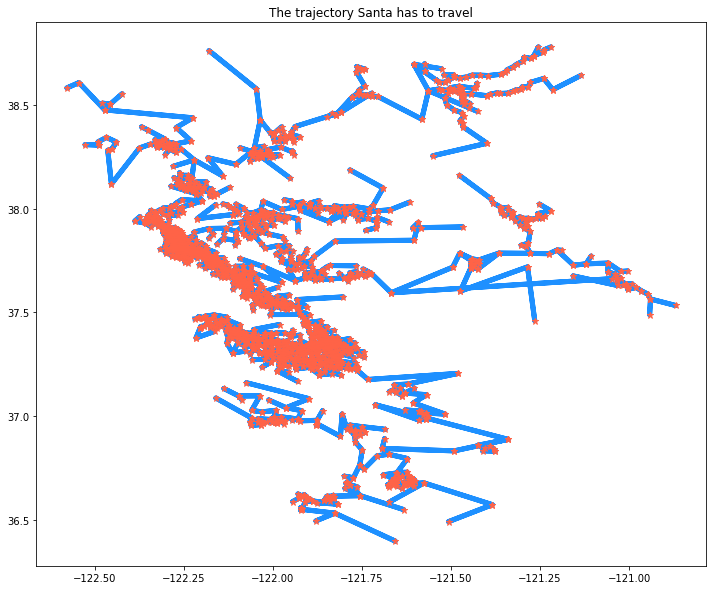

In [23]:
X = []
Y = []

for node in path:
    X.append(node_dic[node]['Location'][0])
    Y.append(node_dic[node]['Location'][1])

# plot the trajectory
plt.figure(figsize=(12, 10))
plt.plot(X, Y, linewidth=5, color='dodgerblue')
plt.plot(X, Y, '*', markersize=7, color='tomato')
plt.title('The trajectory Santa has to travel')

### Question 11:
Plot the road mesh that you obtain and explain the result. Create a graph G∆ whose nodes are different locations and its edges are produced by triangulation.

In [24]:
from scipy.spatial import Delaunay

vertices = nx.nodes(Gcc)
mean_coordinates = np.zeros((len(json_data['features']), 2))
for i in range(len(json_data['features'])):
    mean_coordinates[i, :] = np.mean(json_data['features'][i]['geometry']['coordinates'][0][0], axis=0)
    
mean_coordinates_gcc = mean_coordinates[[x-1 for x in vertices], :]
triangulation = Delaunay(mean_coordinates_gcc)

Text(0.5, 1.0, 'Road Mesh in SF Bay Area')

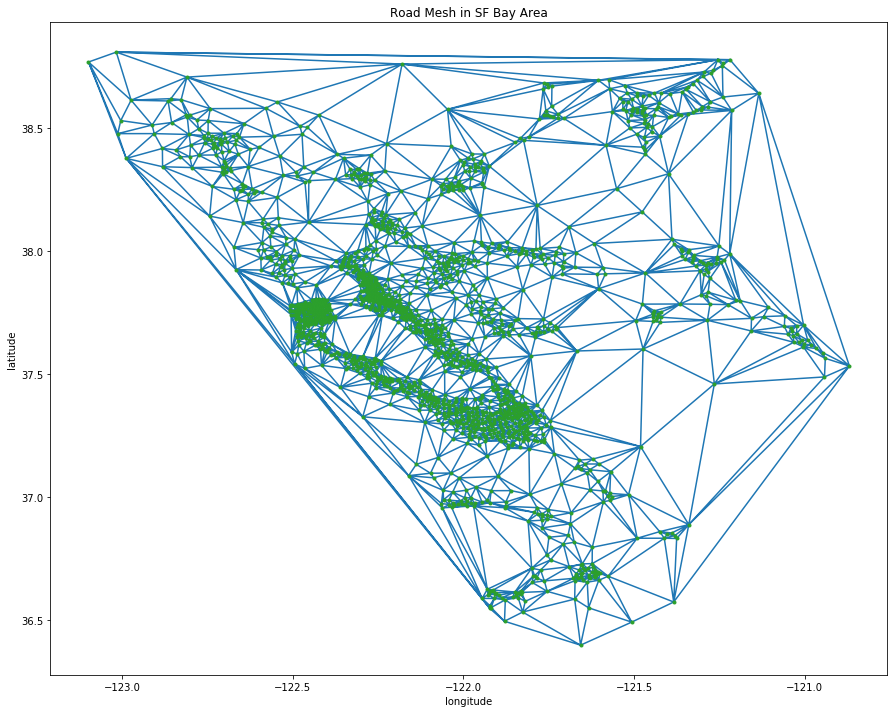

In [25]:
plt.figure(figsize=(15,12))
plt.triplot(mean_coordinates_gcc[:,0], mean_coordinates_gcc[:,1], triangulation.simplices)
plt.plot(mean_coordinates_gcc[:,0], mean_coordinates_gcc[:,1], '.')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Road Mesh in SF Bay Area')

In [26]:
G_delta = nx.Graph()

used_nodes = triangulation.simplices
edges_delta = set()
for row in range(used_nodes.shape[0]):
    for index in range(3):   
        node1 = list(vertices)[used_nodes[row][index]]
        node2 = list(vertices)[used_nodes[row][(index + 1) % 3]]
        if (node1, node2) not in edges_delta and (node2, node1) not in edges_delta:
            edges_delta.add((node1, node2))
            G_delta.add_edge(node1, node2)
#         if (node1, node2) in edge_dic or (node2, node1) in edge_dic and \
#         (node1, node2) not in edges_delta and (node2, node1) not in edges_delta:
#             edges_delta.add((node1, node2))
#             if (node1, node2) in edge_dic:
#                 weight = edge_dic[(node1, node2)][0] / edge_dic[(node1, node2)][1]
#                 G_delta.add_edge(node1, node2, weight=weight)
#             else:
#                 weight = edge_dic[(node2, node1)][0] / edge_dic[(node2, node1)][1]
#                 G_delta.add_edge(node2, node1, weight=weight)
                
print("Number of nodes in G_delta:", nx.number_of_nodes(G_delta))
print("Number of edges in G_delta:", nx.number_of_edges(G_delta))

Number of nodes in G_delta: 1898
Number of edges in G_delta: 5680


### Question 12:
Using simple math, calculate the traffic flow for each road in terms of cars/hour. Report your derivation.
Consider the following assumptions:

- Each degree of latitude and longitude ≈ 69 miles
- Carlength≈5m=0.003mile
- Cars maintain a safety distance of 2 seconds to the next car
- Each road has 2 lanes in each direction

Assuming no traffic jam, consider the calculated traffic flow as the max capacity of each road.

In [27]:
miles_per_degree = 69
car_len = 0.003
safe_time = 2/3600
lanes = 2
traffic_flow = {}
fake_flow = []

edges_delta = nx.edges(G_delta)

for edge in list(edges_delta):
    u = edge[0]
    v = edge[1]
    mean_time = 1e8
    if (u, v) in edge_dic:
        mean_time = edge_dic[(u, v)][0] / edge_dic[(u, v)][1]
    elif (v, u) in edge_dic:
        mean_time = edge_dic[(v, u)][0] / edge_dic[(v, u)][1]
        
    miles = np.sqrt(np.square(
                    abs(node_dic[u]['Location'][0] - node_dic[v]['Location'][0]) * miles_per_degree) +
                    np.square(
                    abs(node_dic[u]['Location'][1] - node_dic[v]['Location'][1]) * miles_per_degree
                )
           )
    
    car_speed = miles / (mean_time / 3600)
    safety_dist = car_speed * safe_time
    car_flow = car_speed / (car_len + safety_dist) * lanes
    G_delta.add_edge(u, v, capacity = car_flow)
    traffic_flow[(u, v)] = car_flow
    if mean_time == 1e8:
        fake_flow.append(car_flow)

fake_flow_threshold = max(fake_flow)
print("The fake flow are all under", fake_flow_threshold)
print("Number of fake flows are:", len(fake_flow))

The fake flow are all under 3.502789189460015
Number of fake flows are: 392


### Question 13:
Calculate the maximum number of cars that can commute per hour from Stanford to UCSC. Also calculate the number of edge-disjoint paths between the two spots. Does the number of edge-disjoint paths match what you see on your road map?

In [28]:
Stanford_ID = 0
UCSC_ID = 0

for key in node_dic:
    if node_dic[key]['DISPLAY_NAME'] == '100 Campus Drive, Stanford':
        Stanford_ID = key
        print("Stanford node id:", Stanford_ID)
    if node_dic[key]['DISPLAY_NAME'] == '700 Meder Street, Santa Cruz':
        UCSC_ID = key
        print("UCSC node id:", UCSC_ID)

UCSC node id: 1968
Stanford node id: 2607


In [29]:
flow_value, flow_dict = nx.maximum_flow(G_delta, UCSC_ID, Stanford_ID)
print("Max flow is:", flow_value)

Max flow is: 14866.47729408998


In [30]:
edge_disjoint_paths = nx.edge_disjoint_paths(G_delta, Stanford_ID, UCSC_ID)
count = 0
for i in edge_disjoint_paths:
    count += 1
    print(i)
    
print("The number of edge-disjoint paths are:", count)

[2607, 1363, 1869, 744, 2242, 1980, 1968]
[2607, 1736, 1762, 1210, 2458, 1955, 1980, 1431, 1968]
[2607, 1726, 1736, 1737, 744, 938, 1989, 1431, 1424, 1968]
[2607, 1725, 1733, 1209, 1762, 1763, 1980, 2241, 1968]
[2607, 2240, 1363, 1737, 1763, 1955, 1171, 2241, 748, 1968]
The number of edge-disjoint paths are: 5


In [31]:
Stanford_loc = node_dic[Stanford_ID]['Location']
print("Stanford location:", Stanford_loc[0], Stanford_loc[1])

UCSC_loc = node_dic[UCSC_ID]['Location']
print("UCSC location:", UCSC_loc[0], UCSC_loc[1])

Stanford location: -122.1759822222222 37.42968588888888
UCSC location: -122.06456181081083 36.97416881081081


Text(0.5, 1.0, 'Zoomed in road map at Stanford')

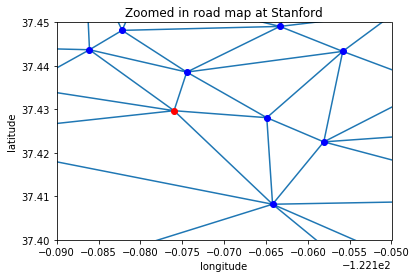

In [32]:
plt.plot(Stanford_loc[0], Stanford_loc[1], 'o', color='red')
for node in node_dic:
    if node != Stanford_ID:
        plt.plot(node_dic[node]['Location'][0], node_dic[node]['Location'][1], 'o', color='blue')
plt.triplot(mean_coordinates_gcc[:,0], mean_coordinates_gcc[:,1], triangulation.simplices)
plt.xlim(-122.19, -122.15)
plt.ylim(37.4, 37.45)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Zoomed in road map at Stanford')

Text(0.5, 1.0, 'Zoomed in road map at UCSC')

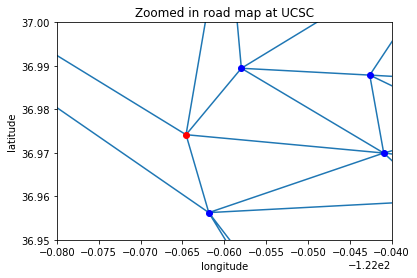

In [33]:
plt.plot(UCSC_loc[0], UCSC_loc[1], 'o', color='red')
for node in node_dic:
    if node != UCSC_ID:
        plt.plot(node_dic[node]['Location'][0], node_dic[node]['Location'][1], 'o', color='blue')
plt.triplot(mean_coordinates_gcc[:,0], mean_coordinates_gcc[:,1], triangulation.simplices)
plt.xlim(-122.08, -122.04)
plt.ylim(36.95, 37.00)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Zoomed in road map at UCSC')

### Question 14:
Plot $\tilde{G}_∆$ on actual coordinates. Are real bridges preserved?

Hint: You can consider the following coordinates:
- Golden Gate Bridge: [[-122.475, 37.806], [-122.479, 37.83]]
- Richmond, San Rafael Bridge: [[-122.501, 37.956], [-122.387, 37.93]]
- San Mateo Bridge: [[-122.273, 37.563], [-122.122, 37.627]]
- Dambarton Bridge: [[-122.142, 37.486], [-122.067, 37.54]]
- San Francisco - Oakland Bay Bridge: [[-122.388, 37.788], [-122.302, 37.825]]

In [34]:
G_tilde = nx.Graph()
G_tilde.add_nodes_from(G_delta)

fake_flow_threshold = 5

for edge in G_delta.edges:
    capacity = G_delta.edges[edge]['capacity']
    if capacity <= fake_flow_threshold:
        continue
    G_tilde.add_edge(edge[0], edge[1], capacity=capacity)

In [35]:
GGB = np.array([[-122.475, 37.806], [-122.479, 37.83]])
RSRB = np.array([[-122.501, 37.956], [-122.387, 37.93]])
SMB = np.array([[-122.273, 37.563], [-122.122, 37.627]])
DB = np.array([[-122.142, 37.486], [-122.067, 37.54]])
SFOBB = np.array([[-122.388, 37.788], [-122.302, 37.825]])
bridges = [GGB, RSRB, SMB, DB, SFOBB]
bridge_on_map = []

def get_nearest_node(target, node_list):
    distances = []
    for i in range(len(node_list)):
        x = node_dic[node_list[i]]['Location'][0]
        y = node_dic[node_list[i]]['Location'][1]  
        dis = (target[0]-x)**2+(target[1]-y)**2
        distances.append(dis)
    return node_list[np.argsort(distances)[0]]

for i in range(len(bridges)):
    road = bridges[i]
    near_nodes1 = []
    near_nodes2 = []
    for node in node_dic:
        x = node_dic[node]['Location'][0]
        y = node_dic[node]['Location'][1]    
        if round(road[0,0], 1) == round(x,1) and round(road[0,1], 1) == round(y,1):
            near_nodes1.append(node)
        if round(road[1,0], 1) == round(x,1) and round(road[1,1], 1) == round(y,1):
            near_nodes2.append(node)
    node1 = get_nearest_node(road[0, :], near_nodes1)
    node2 = get_nearest_node(road[1, :], near_nodes2)
    bridge_on_map.append((node1, node2))

Text(0.5, 1.0, 'Graph with fake traffic flow trimmed')

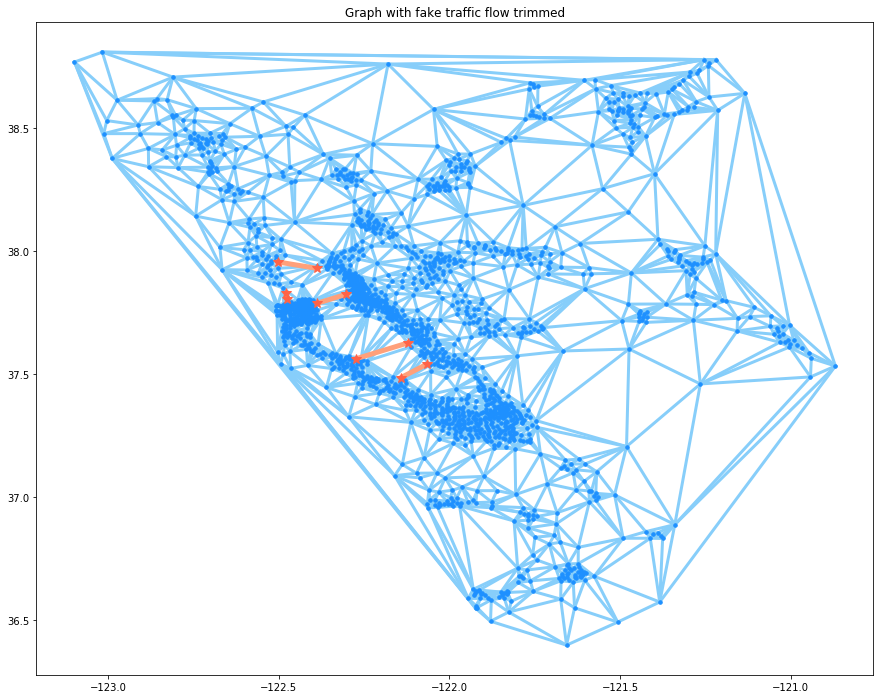

In [36]:
plt.figure(figsize=(15, 12))
    
for edge in G_delta.edges:
    x = [node_dic[edge[0]]['Location'][0], node_dic[edge[1]]['Location'][0]]
    y = [node_dic[edge[0]]['Location'][1], node_dic[edge[1]]['Location'][1]]
    plt.plot(x, y, linewidth=3, color='lightskyblue')
    
for node in G_delta.nodes:
    plt.plot(node_dic[node]['Location'][0], node_dic[node]['Location'][1], '.', markersize=7, color='dodgerblue')
    
for road in bridges:
    x = [road[0,0], road[1,0]]
    y = [road[0,1], road[1,1]]
#     x = [node_dic[road[0]]['Location'][0], node_dic[road[1]]['Location'][0]]
#     y = [node_dic[road[0]]['Location'][1], node_dic[road[1]]['Location'][1]]
    plt.plot(x, y, linewidth=5, color='lightsalmon')
    plt.plot(x, y, '*', markersize=10, color='tomato')
plt.title('Graph with fake traffic flow trimmed')

### Question 15:
Now, repeat question 13 for $\tilde{G}_∆$ and report the results. Do you see any significant changes?

In [37]:
flow_value, flow_dict = nx.maximum_flow(G_tilde, UCSC_ID, Stanford_ID)
print("Max flow is:", flow_value)

Max flow is: 14866.477294089984


In [38]:
edge_disjoint_paths = nx.edge_disjoint_paths(G_tilde, Stanford_ID, UCSC_ID)
count = 0
for i in edge_disjoint_paths:
    count += 1
    print(i)
    
print("The number of edge-disjoint paths are:", count)

[2607, 1363, 1361, 1849, 1848, 1853, 1357, 2223, 2222, 931, 829, 2656, 725, 1936, 2596, 1934, 1989, 1431, 1980, 1968]
[2607, 1736, 1363, 1869, 1853, 2223, 2490, 1948, 2656, 1947, 725, 2221, 1934, 2232, 1432, 239, 1424, 748, 1968]
[2607, 1726, 1736, 1737, 1869, 744, 1947, 2221, 938, 1989, 1432, 1431, 1968]
[2607, 2378, 743, 1852, 1358, 1850, 1849, 1853, 744, 1948, 1947, 938, 2242, 2528, 1980, 2241, 1968]
[2607, 2240, 1363, 1737, 744, 938, 2528, 1981, 1431, 1424, 1968]
The number of edge-disjoint paths are: 5


Text(0.5, 1.0, 'Zoomed in road map at Stanford')

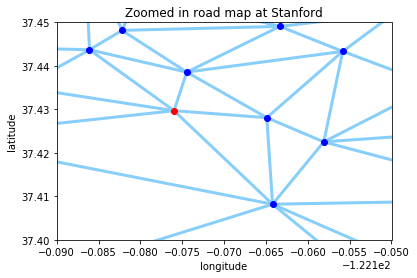

In [39]:
for edge in G_delta.edges:
    x = [node_dic[edge[0]]['Location'][0], node_dic[edge[1]]['Location'][0]]
    y = [node_dic[edge[0]]['Location'][1], node_dic[edge[1]]['Location'][1]]
    plt.plot(x, y, linewidth=3, color='lightskyblue')
    
plt.plot(Stanford_loc[0], Stanford_loc[1], 'o', color='red')
for node in node_dic:
    if node != Stanford_ID:
        plt.plot(node_dic[node]['Location'][0], node_dic[node]['Location'][1], 'o', color='blue')
plt.xlim(-122.19, -122.15)
plt.ylim(37.4, 37.45)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Zoomed in road map at Stanford')

Text(0.5, 1.0, 'Zoomed in road map at UCSC')

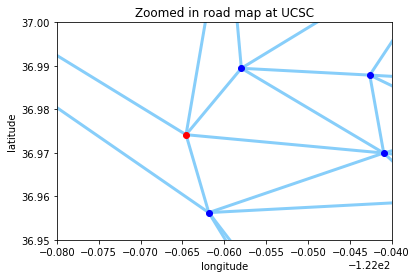

In [40]:
for edge in G_delta.edges:
    x = [node_dic[edge[0]]['Location'][0], node_dic[edge[1]]['Location'][0]]
    y = [node_dic[edge[0]]['Location'][1], node_dic[edge[1]]['Location'][1]]
    plt.plot(x, y, linewidth=3, color='lightskyblue')

plt.plot(UCSC_loc[0], UCSC_loc[1], 'o', color='red')
for node in node_dic:
    if node != UCSC_ID:
        plt.plot(node_dic[node]['Location'][0], node_dic[node]['Location'][1], 'o', color='blue')
plt.xlim(-122.08, -122.04)
plt.ylim(36.95, 37.00)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Zoomed in road map at UCSC')